Time elapsed is 8.164119 seconds


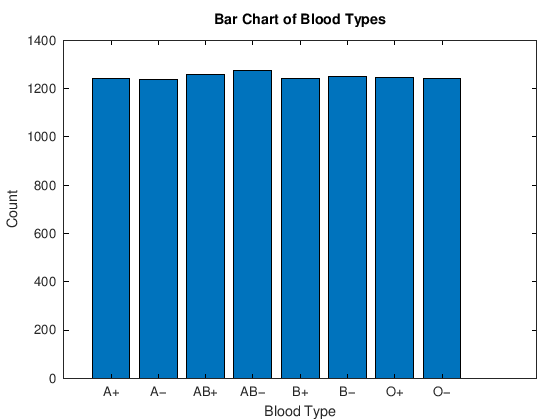

In [8]:
% Open the file for reading
fileID = fopen('healthcare_dataset2.csv', 'r');

% Read the data using textscan, specifying ';' as the delimiter
data = textscan(fileID, '%s %f %s %s %*[^\n]', 'Delimiter', ';', 'HeaderLines', 1);

% Close the file
fclose(fileID);

% Start the timer
tic;

% Switch to the gnuplot graphics toolkit
graphics_toolkit('gnuplot')

% Extract the blood types column (assuming it's the fourth column)
blood_types = data{4};

% Compute unique blood types and their counts
[unique_blood_types, ~, idx] = unique(blood_types);
blood_type_counts = histc(idx, 1:numel(unique_blood_types));

% Plot the bar chart
bar(1:numel(unique_blood_types), blood_type_counts)
xticks(1:numel(unique_blood_types))
xticklabels(unique_blood_types)
title('Bar Chart of Blood Types')
xlabel('Blood Type')
ylabel('Count')

% Stop the timer and display the elapsed time
elapsed_time = toc;
fprintf('Time elapsed is %f seconds\n', elapsed_time);

# histogram

Time elapsed is 3.952881 seconds


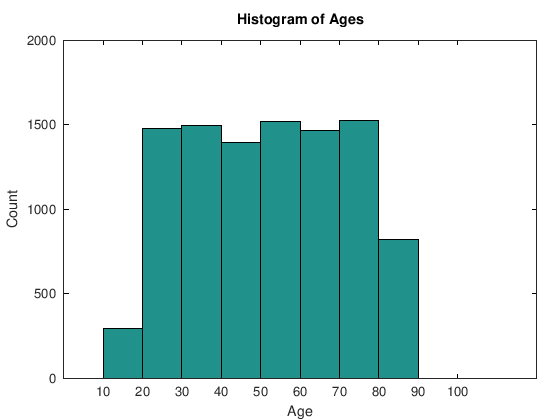

In [4]:
% Switch to the gnuplot graphics toolkit
graphics_toolkit('gnuplot')

% Open the file for reading
fileID = fopen('healthcare_dataset2.csv', 'r');

% Read the data using textscan, specifying ';' as the delimiter
data = textscan(fileID, '%*s %d %*[^\n]', 'Delimiter', ';', 'HeaderLines', 1);

% Close the file
fclose(fileID);

% Start the timer
tic;

% Extract the ages column (assuming it's the second column)
ages = data{1};

% Define the bin edges
bin_edges = 10:10:100;

% Compute the histogram
age_counts = histc(ages, bin_edges);

% Plot the histogram
bar(bin_edges, age_counts, 'histc');
title('Histogram of Ages')
xlabel('Age')
ylabel('Count')
% Stop the timer and display the elapsed time
elapsed_time = toc;
fprintf('Time elapsed is %f seconds\n', elapsed_time);

Time elapsed is 12.787016 seconds


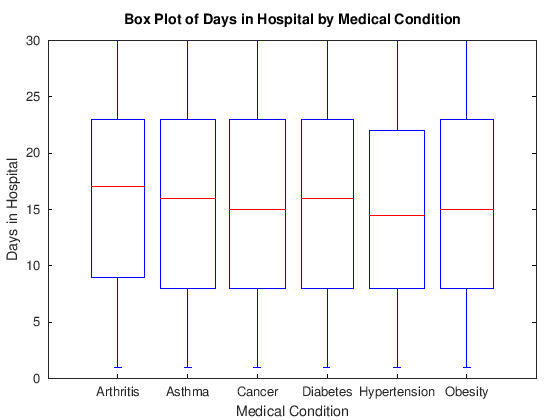

In [2]:
pkg load statistics
% Open the file for reading
fileID = fopen('healthcare_dataset2.csv', 'r');

% Read the data using textscan, specifying ';' as the delimiter
data = textscan(fileID, '%*s %*s %*s %*s %s %*s %*s %*s %*s %*s %*s %*s %*s %*s %*s %d %*[^\n]', 'Delimiter', ';', 'HeaderLines', 1);

% Close the file
fclose(fileID);

% Start the timer
tic;

% Switch to the gnuplot graphics toolkit
graphics_toolkit('gnuplot')


% Extract the medical condition and days in hospital columns
medical_condition = data{1};
days_in_hospital = data{2};

% Group the days in hospital by medical condition
[unique_conditions, ~, idx] = unique(medical_condition);
grouped_days = accumarray(idx, days_in_hospital, [], @(x) {x});

% Find the maximum group size
max_group_size = max(cellfun(@numel, grouped_days));

% Create a matrix for boxplot, padding shorter groups with NaN
grouped_days_mat = NaN(max_group_size, numel(grouped_days));
for i = 1:numel(grouped_days)
    grouped_days_mat(1:numel(grouped_days{i}), i) = grouped_days{i};
end

% Plot the box plot
boxplot(grouped_days_mat);
set(gca, 'XTickLabel', unique_conditions);
title('Box Plot of Days in Hospital by Medical Condition')
xlabel('Medical Condition')
ylabel('Days in Hospital')

% Stop the timer and display the elapsed time
elapsed_time = toc;
fprintf('Time elapsed is %f seconds\n', elapsed_time);

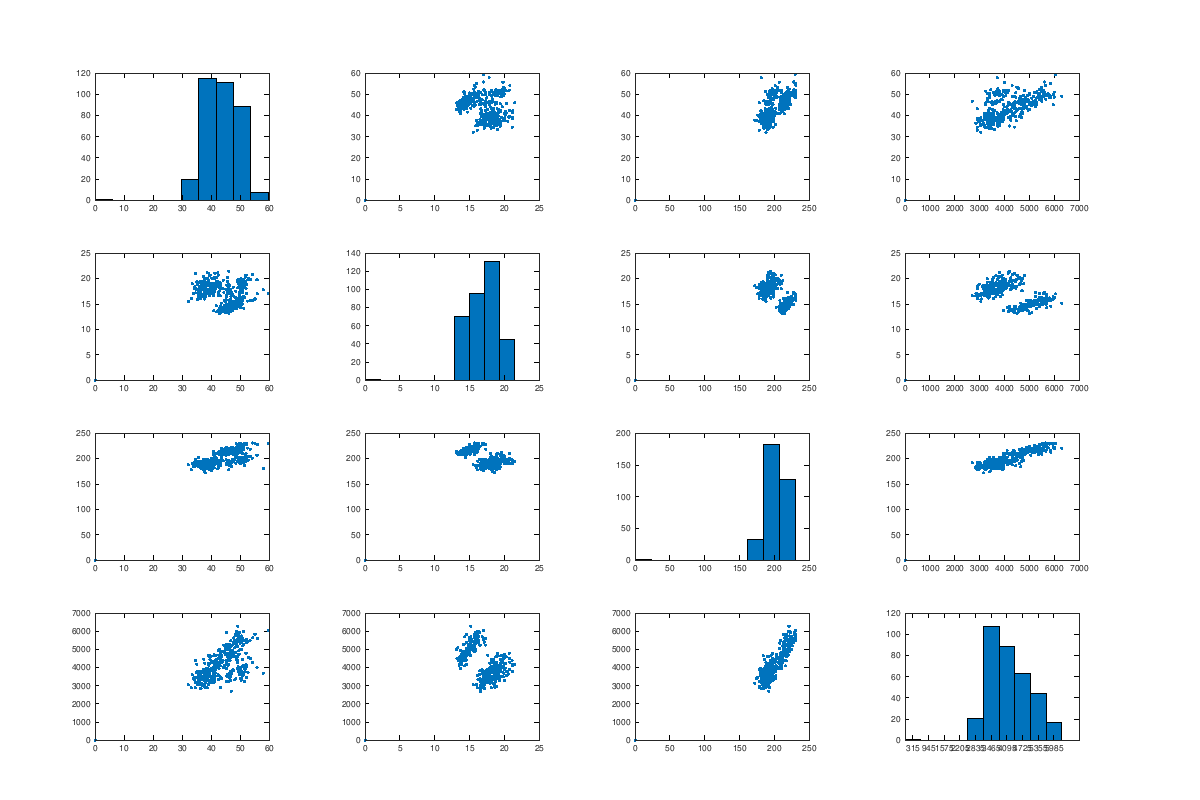

In [15]:
% Load necessary package
pkg load statistics
% Switch to the gnuplot graphics toolkit
graphics_toolkit('gnuplot')

% Extract the columns for "culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"
data = df(:, [3, 4, 5, 6]);  

% Define labels for the columns
labels = {"Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)"};

% Set figure size
figure('Position', [100, 100, 1200, 800]);  % Set figure position and size

% Create scatterplot matrix with labels
plotmatrix(data);

% Adjust font size of labels
set(findall(gcf, 'type', 'axes'), 'FontSize', 3); % Set font size for all axes
